In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings

warnings.filterwarnings("ignore")

In [27]:
data = pd.read_excel('house_data.xlsx')
print(data.shape)
data

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


```
1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso
exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que
puedan afectar la calidad del modelo, si los hay.
```

In [28]:

# Mostrar información general sobre el dataframe
print("Información general del dataframe:")
print(data.info())

# Mostrar estadísticas descriptivas para identificar posibles valores atípicos
print("\nEstadísticas descriptivas del dataframe:")
print(data.describe())

# Contar valores faltantes por columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Eliminar filas con valores faltantes
data = data.dropna()

# Eliminar duplicados
data = data.drop_duplicates()

# Mostrar el tamaño del dataframe después de la limpieza
print("\nTamaño del dataframe después de la limpieza:")
print(data.shape)
data


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [29]:
data= data.drop(['id','date'], axis=1)

In [30]:
def data_quality_analysis(df):
    #crear un nuevo dataframe para almacenar los resultados
    result_df= pd.DataFrame(columns=['Columna','Tipo de Dato', 'Valores unicos','valores faltantes'])
        
    #Obtener informacion general del data frame 
    columns = df.columns
    data_types =df.dtypes.to_list()
    unique_values  =[df[column].nunique() for column in columns]
    missing_values= [df[column].isnull().sum() for column in columns]
    
    #Llenar el nuevo dataframe con los resultados 
    result_df['Columna']=columns
    result_df['Tipo de Dato']=data_types
    result_df['Valores unicos']=unique_values
    result_df['Valores faltantes']= missing_values
    
    return result_df

resultado_analisis= data_quality_analysis(data).set_index('Columna')
print(resultado_analisis.sort_values('Tipo de Dato'))

              Tipo de Dato  Valores unicos valores faltantes  \
Columna                                                        
price                int64            4028               NaN   
zipcode              int64              70               NaN   
yr_renovated         int64              70               NaN   
yr_built             int64             116               NaN   
sqft_basement        int64             306               NaN   
sqft_above           int64             946               NaN   
sqft_living15        int64             777               NaN   
condition            int64               5               NaN   
grade                int64              12               NaN   
waterfront           int64               2               NaN   
sqft_lot             int64            9782               NaN   
sqft_living          int64            1038               NaN   
bedrooms             int64              13               NaN   
view                 int64              

```
2. Realizar un análisis descriptivo de las variables para entender la distribución de los
datos y detectar posibles relaciones entre las características y los precios. En esto
debes incluir un análisis de correlaciones entre las variables principalmente con el
precio de las casas
```

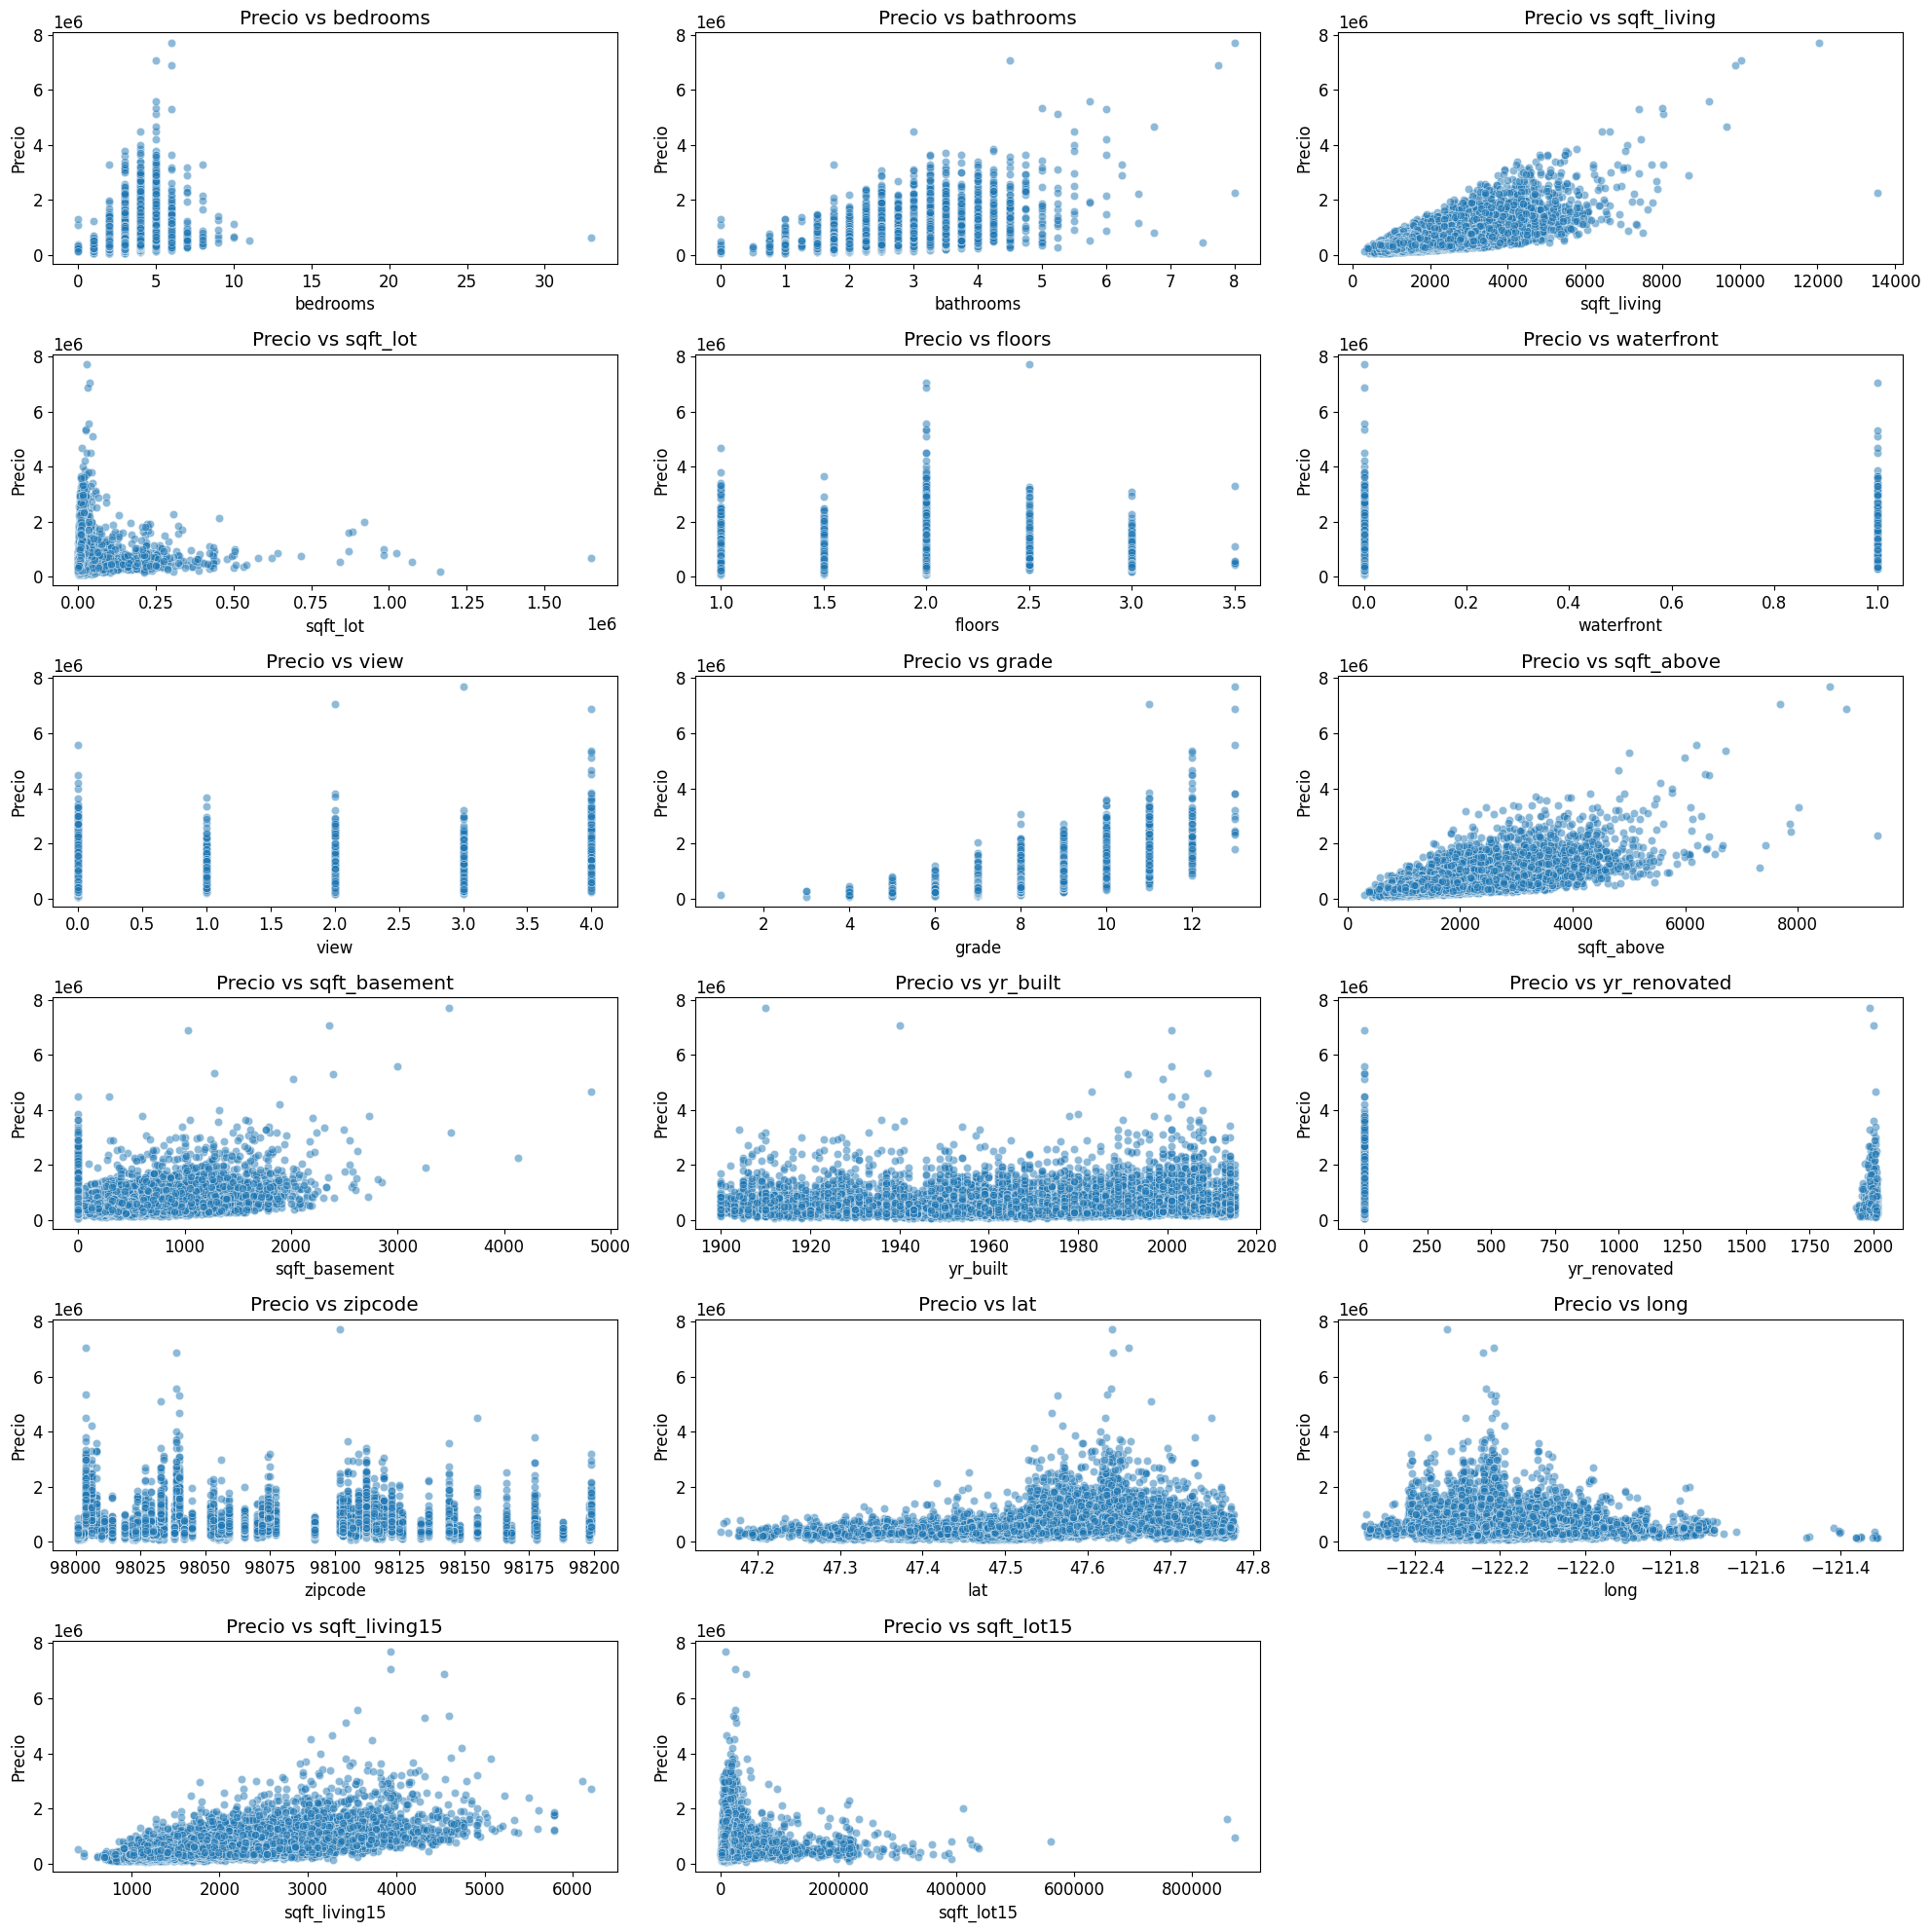

<Figure size 1200x800 with 0 Axes>

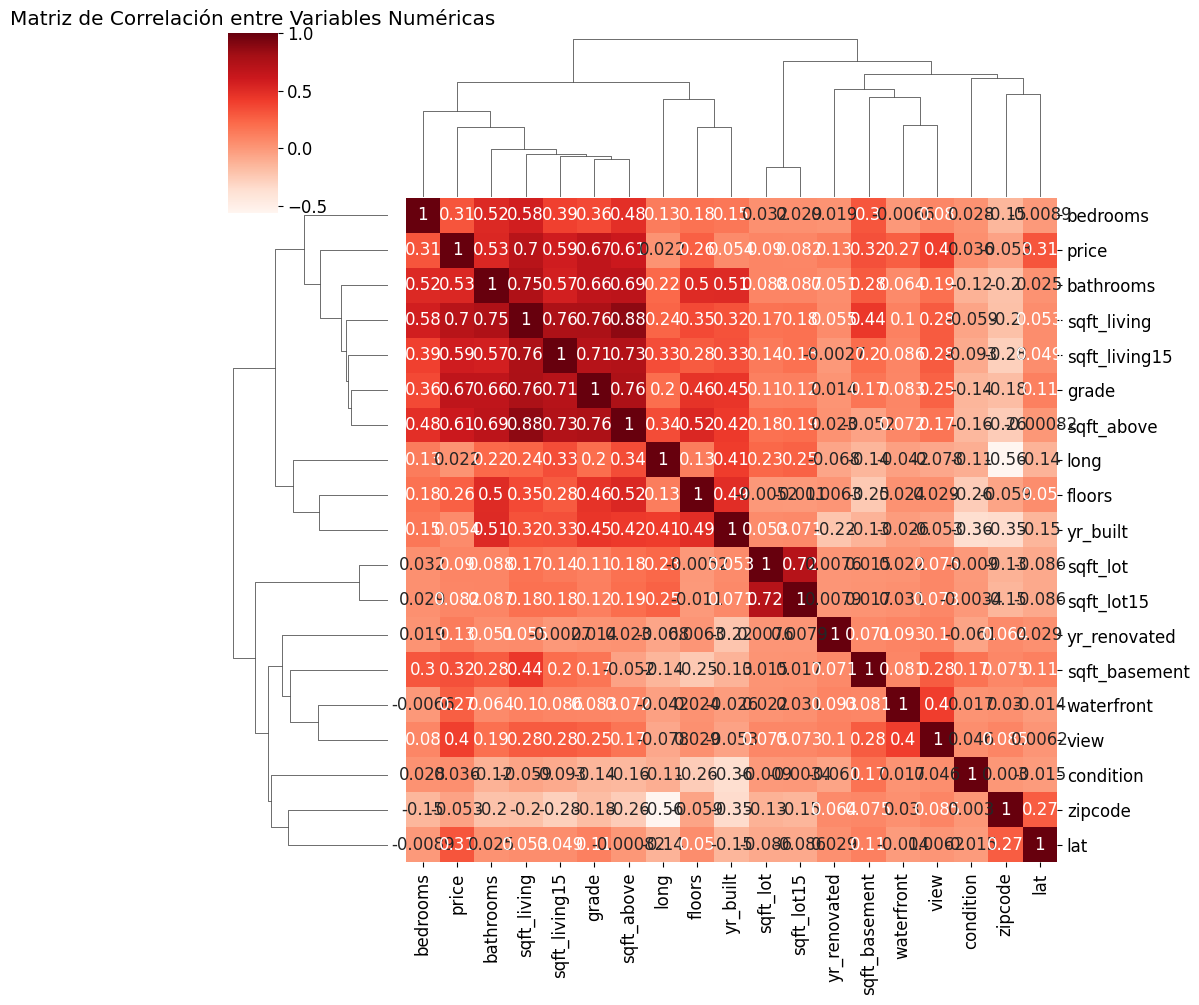

In [31]:
# Gráficos de dispersión entre las características y el precio
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
            'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(6, 3, i + 1)
    sns.scatterplot(x=feature, y='price', data=data, alpha=0.5)
    plt.title(f'Precio vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Precio')
plt.tight_layout()
plt.show()

# Seleccionar solo las columnas numéricas del dataframe
numeric_cols = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.clustermap(correlation_matrix, annot=True, cmap='Reds', )
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

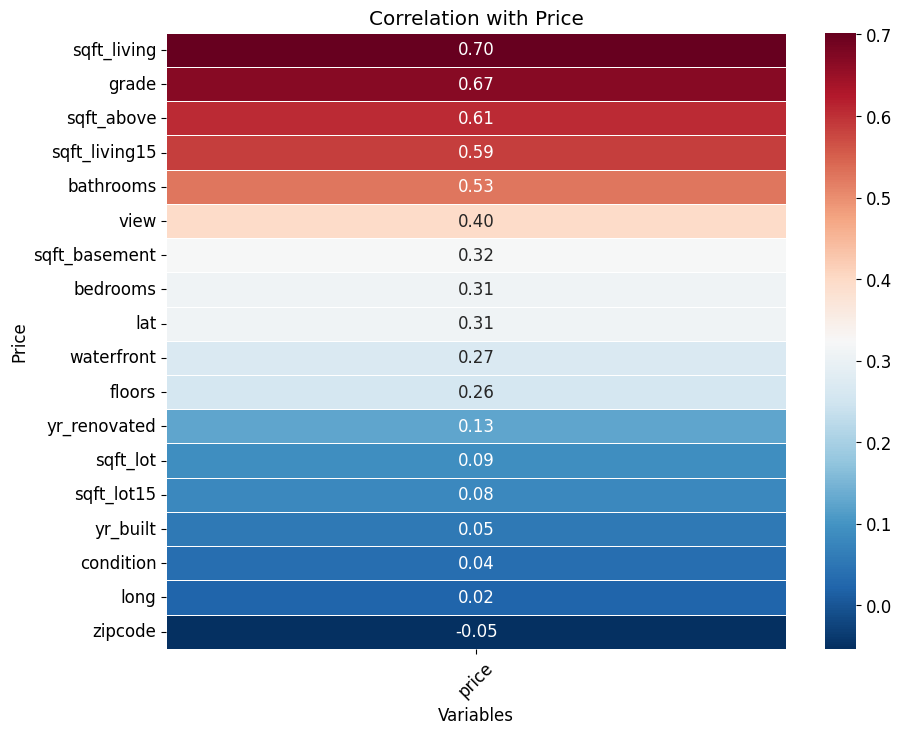

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix.loc[:, ["price"]].sort_values("price", ascending=False).iloc[1:],
    cmap="RdBu_r",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Correlation with Price")
plt.xlabel("Variables")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.rcParams.update({"font.size": 12})
plt.show()

```
3. Aplicar técnicas de transformación de datos, como normalización o estandarización,
para asegurar que las variables estén en una escala comparable. Luego de ello,
divide el conjunto de datos en conjuntos de entrenamiento y prueba de manera
aleatoria o estratificada.

```

In [33]:
X = pd.get_dummies(data).drop(columns=['price'])  # Características excluyendo 'price' y 'date'
y = data['price']  # Variable objetivo

# Normalización o estandarización de las características
scaler = StandardScaler()  # Creamos un objeto para estandarizar los datos
X_scaled = scaler.fit_transform(X)  # Aplicamos la estandarización a las características

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de los conjuntos de entrenamiento y prueba:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Dimensiones de los conjuntos de entrenamiento y prueba:
X_train shape: (17290, 18)
y_train shape: (17290,)
X_test shape: (4323, 18)
y_test shape: (4323,)


```
4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso o
Elastic Net y ajuste los hiper parámetros mostrando como se mueve los
hiperparametros y el ajuste. Además, debes construir modelos de árboles de
regresión para capturar relaciones no lineales y complejas entre las variables
predictoras y el precio de las casas.
```

Mejor alpha para Ridge: 100
Mejor alpha para Lasso: 100
Mejor alpha para ElasticNet: 1
Mejor l1_ratio para ElasticNet: 0.7


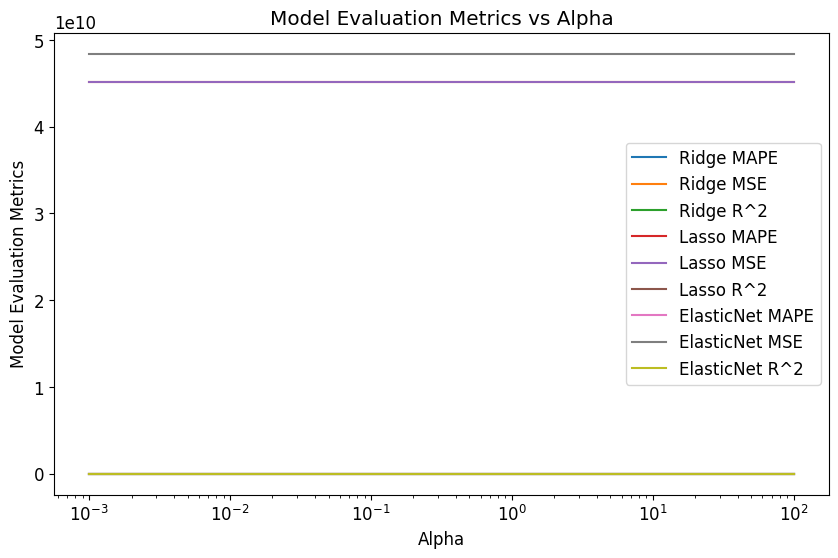

In [34]:
def regularized_regression_comparison(
    X_train, X_test, y_train, y_test, alpha_values, l1_ratios
):
    # Define los parámetros para la búsqueda de cuadrícula
    ridge_param_grid = {"alpha": alpha_values}
    lasso_param_grid = {"alpha": alpha_values}
    elasticnet_param_grid = {"alpha": alpha_values, "l1_ratio": l1_ratios}

    # Realiza la búsqueda de cuadrícula para Ridge Regression
    ridge_grid_search = GridSearchCV(
        Ridge(), ridge_param_grid, cv=5, scoring="neg_mean_absolute_percentage_error"
    )
    ridge_grid_search.fit(X_train, y_train)
    best_ridge_alpha = ridge_grid_search.best_params_["alpha"]
    print("Mejor alpha para Ridge:", best_ridge_alpha)

    # Realiza la búsqueda de cuadrícula para Lasso Regression
    lasso_grid_search = GridSearchCV(
        Lasso(), lasso_param_grid, cv=5, scoring="neg_mean_absolute_percentage_error"
    )
    lasso_grid_search.fit(X_train, y_train)
    best_lasso_alpha = lasso_grid_search.best_params_["alpha"]
    print("Mejor alpha para Lasso:", best_lasso_alpha)

    # Realiza la búsqueda de cuadrícula para ElasticNet Regression
    elasticnet_grid_search = GridSearchCV(
        ElasticNet(),
        elasticnet_param_grid,
        cv=5,
        scoring="neg_mean_absolute_percentage_error",
    )
    elasticnet_grid_search.fit(X_train, y_train)
    best_elasticnet_alpha = elasticnet_grid_search.best_params_["alpha"]
    best_elasticnet_l1_ratio = elasticnet_grid_search.best_params_["l1_ratio"]
    print("Mejor alpha para ElasticNet:", best_elasticnet_alpha)
    print("Mejor l1_ratio para ElasticNet:", best_elasticnet_l1_ratio)

    # Ridge Regression con el mejor alpha
    ridge_model = Ridge(alpha=best_ridge_alpha, max_iter=100000)
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)
    ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)

    # Lasso Regression con el mejor alpha
    lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=100000)
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)
    lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)

    # ElasticNet Regression con los mejores alphas
    elasticnet_model = ElasticNet(
        alpha=best_elasticnet_alpha, l1_ratio=best_elasticnet_l1_ratio, max_iter=100000
    )
    elasticnet_model.fit(X_train, y_train)
    elasticnet_pred = elasticnet_model.predict(X_test)
    elasticnet_mape = mean_absolute_percentage_error(y_test, elasticnet_pred)
    elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)
    elasticnet_r2 = r2_score(y_test, elasticnet_pred)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, [ridge_mape] * len(alpha_values), label="Ridge MAPE",linestyle="--")
    plt.plot(alpha_values, [ridge_mse] * len(alpha_values), label="Ridge MSE",linestyle="--")
    plt.plot(alpha_values, [ridge_r2] * len(alpha_values), label="Ridge R^2",linestyle="--")
    plt.plot(alpha_values, [lasso_mape] * len(alpha_values), label="Lasso MAPE",linestyle="--")
    plt.plot(alpha_values, [lasso_mse] * len(alpha_values), label="Lasso MSE",linestyle="--")
    plt.plot(alpha_values, [lasso_r2] * len(alpha_values), label="Lasso R^2",linestyle="--")
    plt.plot(
        alpha_values, [elasticnet_mape] * len(alpha_values), label="ElasticNet MAPE" ,linestyle="--"
    )
    plt.plot(alpha_values, [elasticnet_mse] * len(alpha_values), label="ElasticNet MSE",linestyle="--")
    plt.plot(alpha_values, [elasticnet_r2] * len(alpha_values), label="ElasticNet R^2",linestyle="--")
    plt.title("Model Evaluation Metrics vs Alpha")
    plt.xlabel("Alpha")
    plt.ylabel("Model Evaluation Metrics")
    plt.xscale("log")
    plt.legend()
    plt.show()



# ElasticNet
plt.plot(
    alpha_values,
    [elasticnet_mape] * len(alpha_values),
    label="ElasticNet MAPE",
    linestyle=":",
)
plt.plot(
    alpha_values,
    [elasticnet_mse] * len(alpha_values),
    label="ElasticNet MSE",
    linestyle=":",
)
plt.plot(
    alpha_values,
    [elasticnet_r2] * len(alpha_values),
    label="ElasticNet R^2",
    linestyle=":",
)

plt.title("Model Evaluation Metrics vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("Model Evaluation Metrics")
plt.xscale("log")
plt.legend()
plt.show()


alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

regularized_regression_comparison(X_train, X_test, y_train, y_test, alpha_values, l1_ratios)

```
Arbol regresion
```

Mejores parámetros: {'max_depth': 10}
Error absoluto porcentual medio en el conjunto de prueba (MAPE): 0.17405147552723785
Error cuadrático medio en el conjunto de prueba (MSE): 39902568006.12608
Coeficiente de determinación en el conjunto de prueba (R^2): 0.7360534740408319


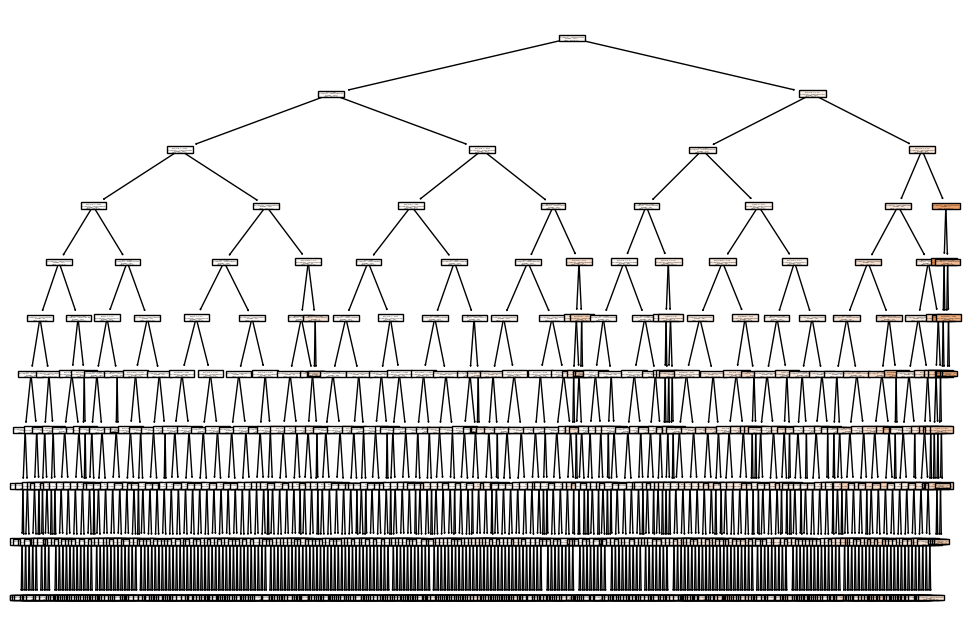

In [35]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


def decision_tree_regression_with_plot(X_train, X_test, y_train, y_test, feature_names):
    # Define los parámetros para la búsqueda de cuadrícula
    param_grid = {"max_depth": [3, 5, 7, 10]}

    # Realiza la búsqueda de cuadrícula para el árbol de regresión
    grid_search = GridSearchCV(
        DecisionTreeRegressor(),
        param_grid,
        cv=5,
        scoring="neg_mean_absolute_percentage_error",
    )
    grid_search.fit(X_train, y_train)

    # Obtiene los mejores parámetros y el mejor modelo
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Entrena el modelo con los mejores parámetros
    best_estimator.fit(X_train, y_train)

    # Calcula las predicciones
    y_pred = best_estimator.predict(X_test)

    # Calcula las métricas
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    print("Mejores parámetros:", best_params)
    print("Error absoluto porcentual medio en el conjunto de prueba (MAPE):", test_mape)
    print("Error cuadrático medio en el conjunto de prueba (MSE):", test_mse)
    print("Coeficiente de determinación en el conjunto de prueba (R^2):", test_r2)

    # Grafica el árbol entrenado
    plt.figure(figsize=(12, 8))
    plot_tree(best_estimator, feature_names=feature_names, filled=True)
    plt.show()

    return best_estimator


# Example usage:
best_tree_model = decision_tree_regression_with_plot(
    X_train, X_test, y_train, y_test, feature_names=X.columns
)

```
5. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE),
el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²), para medir el
rendimiento del modelo y concluir sobre ellos
```

In [37]:
# Suponiendo que ya tienes los modelos entrenados
models = {
    "DecisionTree": best_tree_model,
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "ElasticNet": elasticnet_model,
}

NameError: name 'decision_tree_model' is not defined